In [15]:
## contains some clustering algorithms. 
import scipy.cluster.hierarchy as hac
import numpy as np
import matplotlib.pyplot as plt

In [16]:
## Clustering is a method to discover non-linear relationships in data. 
## For example, one wants to segregate the data into groups -- one thinks of
## points as being equivalent if they are "close enough" in some sense.  This
## breaks your data set up into equivalence classes. 

## There are many varieties of clustering that one can use.  There are techniques
## where one `trains' software to distinguish between one `type' of  data and another
## for instance pictures of cats vs. dogs.  This tends to be called a `classification'
## problem and is often considered distinct from clustering. 

## There is also higher-order clustering where one attempts to discover if data is 
## distributed around some fairly tame low-dimensional object, such as a sphere.   

## let's load the afternoon Jan 21st weather data. 

import simplejson
f = open('temp-vs-alt.jan21.afternoon.txt','r')
[x,y] = simplejson.load(f)
f.close()

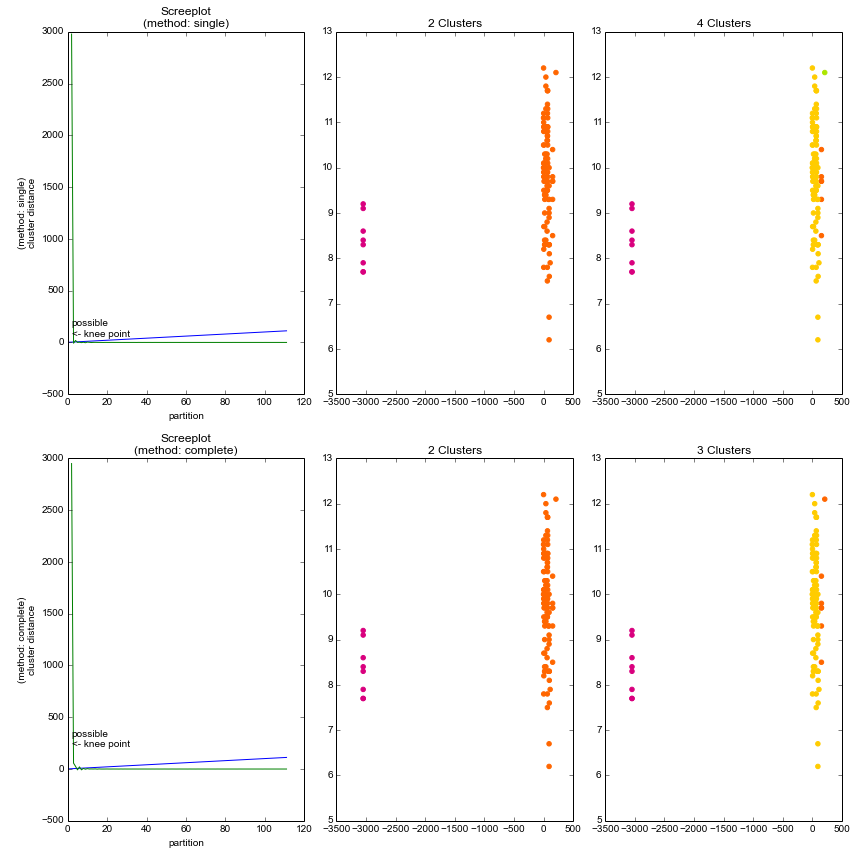

In [27]:
## The scipy clustering algorithms require a list of vectors as input.  So we 
## convert the list of x and list of y coordinates, into a list of vectors in the
## (x,y)-plane... and it also requires a numpy array, so we cast it to a numpy
## array.

xylist = np.array([ [float(x[i]),float(y[i])] for i in range(len(x)) ])

fig, axes23 = plt.subplots(2,3, figsize=(12,12))

for method, axes in zip(['single','complete'], axes23):
    z = hac.linkage(xylist, method=method)
    
    axes[0].plot(range(1, len(z)+1))
    knee = np.diff(z[::-1,2],2)
    axes[0].plot(range(2,len(z)), knee)
    
    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()]=0
    num_clust2 = knee.argmax() + 2
    
    axes[0].text(num_clust1, z[::-1,2][num_clust1-1], 'possible\n<- knee point')
    
    part1=hac.fcluster(z, num_clust1, 'maxclust')
    part2=hac.fcluster(z, num_clust2, 'maxclust')
    
    clr = ['#2200CC', '#D9007E', '#FF6600', '#FFCC00', '#ACE600', '#0099CC', '#8900CC', '#FF0000', '#FF9900', '#FFFF00', '#00CC01', '#0055CC']
    
    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(xylist[part==cluster,0], xylist[part==cluster,1], color=clr[cluster])
            
    m='\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition', ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()